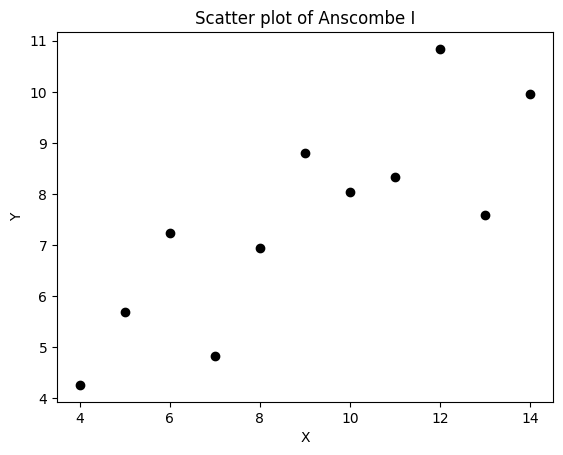

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 24 Nov 2025   Prob (F-statistic):            0.00217
Time:                        12:57:31   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

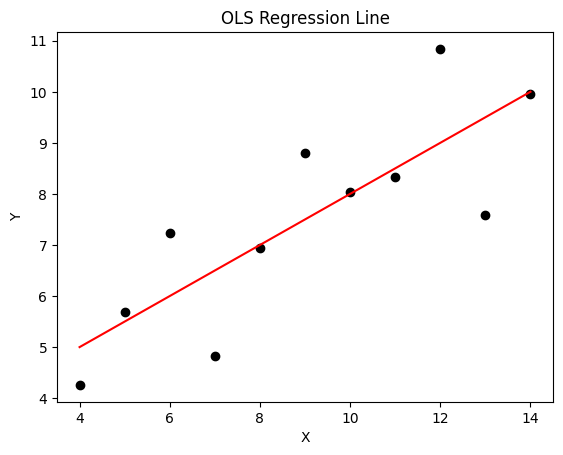

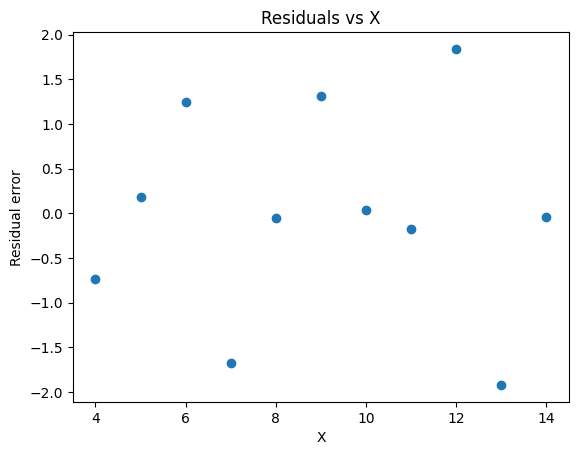

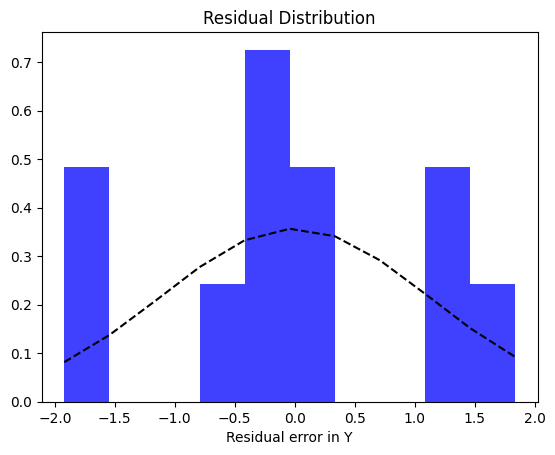

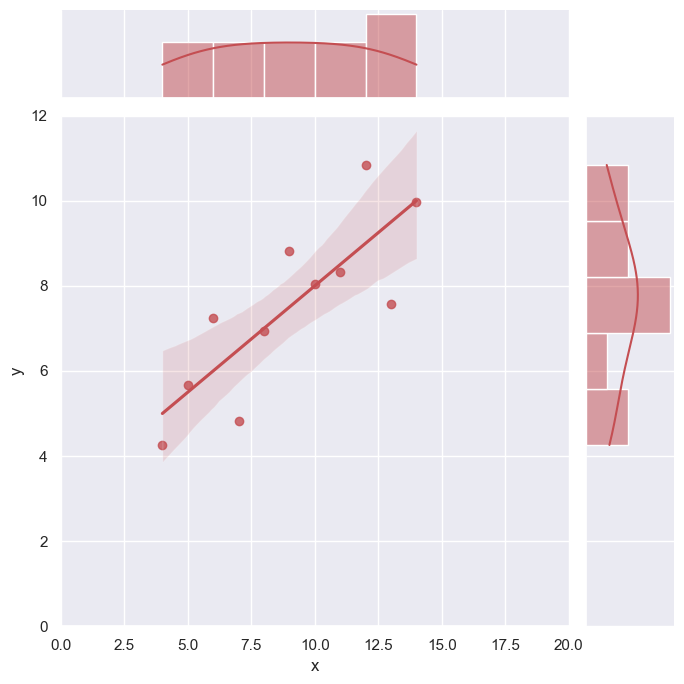

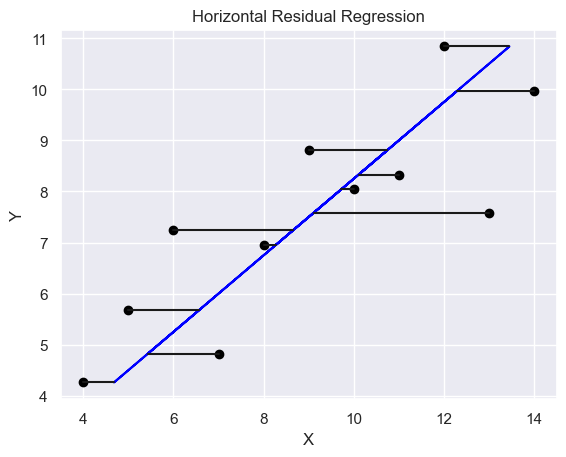

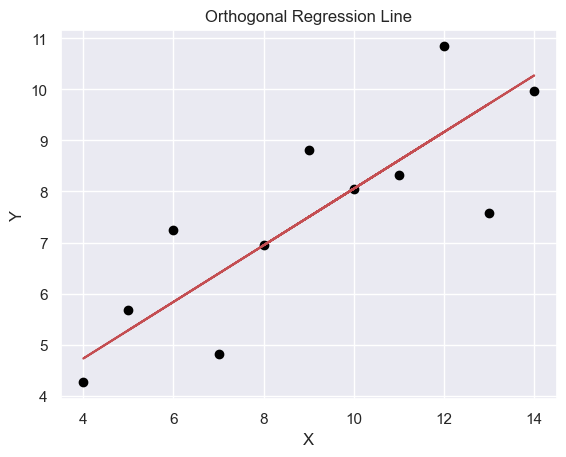

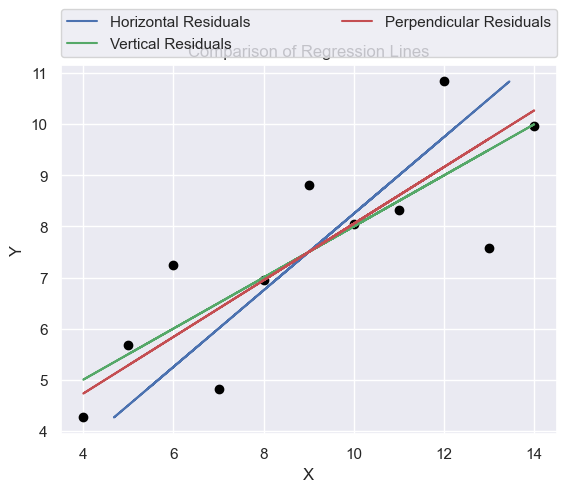

In [1]:
# Linear Regression Tutorial - Built-in Anscombe I dataset

# 1️⃣ Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress, norm

%matplotlib inline

# 2️⃣ Create Anscombe I dataset directly
data = {
    "x": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    "y": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
}
anscombe_i = pd.DataFrame(data)

# 3️⃣ Scatter plot of data
plt.scatter(anscombe_i.x, anscombe_i.y, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of Anscombe I")
plt.show()

# 4️⃣ Fit simple linear regression using statsmodels
y = anscombe_i.y
X = sm.add_constant(anscombe_i.x)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

# Plot fitted line
plt.scatter(anscombe_i.x, anscombe_i.y, color='black')
X_prime = np.linspace(min(anscombe_i.x), max(anscombe_i.x), 100)
X_prime_const = sm.add_constant(X_prime)
y_hat = model.predict(X_prime_const)
plt.plot(X_prime, y_hat, 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("OLS Regression Line")
plt.show()

# 5️⃣ Residuals and histogram
residual_error = anscombe_i.y - model.predict(X)
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)

# Residual vs X
plt.figure()
plt.scatter(anscombe_i.x, residual_error, label='Residual error')
plt.xlabel("X")
plt.ylabel("Residual error")
plt.title("Residuals vs X")
plt.show()

# Histogram of residuals
plt.figure()
n, bins, patches = plt.hist(residual_error, 10, density=True, facecolor='blue', alpha=0.75)
y_pdf = norm.pdf(bins, error_mean, error_sigma)
plt.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.xlabel("Residual error in Y")
plt.title("Residual Distribution")
plt.show()

# 6️⃣ Seaborn jointplot with regression
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x="x", y="y", data=anscombe_i, kind="reg",
              xlim=(0, 20), ylim=(0, 12), color="r", height=7)

# 7️⃣ Horizontal residuals regression
k, d = np.polyfit(anscombe_i.y, anscombe_i.x, 1)
xfit = k * anscombe_i.y + d

plt.figure()
plt.scatter(anscombe_i.x, anscombe_i.y, color='black')
plt.plot(xfit, anscombe_i.y, 'blue')
for ii in range(len(anscombe_i.y)):
    plt.plot([xfit[ii], anscombe_i.x[ii]], [anscombe_i.y[ii], anscombe_i.y[ii]], 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Horizontal Residual Regression")
plt.show()

# 8️⃣ Total Least Squares (Orthogonal Distance Regression)
def fit_function(p, x):
    return p[0] * x + p[1]

def orthoregress(x, y):
    linregression = linregress(x, y)
    model = Model(fit_function)
    data = Data(x, y)
    od = ODR(data, model, beta0=linregression[0:2])
    out = od.run()
    return list(out.beta)

m, b = orthoregress(anscombe_i.x.values, anscombe_i.y.values)
y_ortho_fit = m * anscombe_i.x + b

plt.figure()
plt.scatter(anscombe_i.x, anscombe_i.y, color='black')
plt.plot(anscombe_i.x, y_ortho_fit, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Orthogonal Regression Line")
plt.show()

# 9️⃣ Plot all three regression lines together
plt.figure()
plt.scatter(anscombe_i.x, anscombe_i.y, color='black')
plt.plot(xfit, anscombe_i.y, 'b', label="Horizontal Residuals")
plt.plot(anscombe_i.x, model.predict(X), 'g', label="Vertical Residuals")
plt.plot(anscombe_i.x, y_ortho_fit, 'r', label="Perpendicular Residuals")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Comparison of Regression Lines")
plt.show()
